In [1]:
import torch
from dataset_class import dataset,params2theta,theta2params
import dataset_class as dc
import pandas as pd
from matplotlib import pyplot as plt

import numpy as np
np.random.seed(42)

In [2]:
def load_dataset(filename,Nmax=10**1000,remove_zeros=True):
    df=pd.read_csv(filename)[:Nmax]
    cts,dils = df['Counts'].to_numpy(),df['Dilution'].to_numpy().astype(float)
    if remove_zeros:
        cts,dils = cts[cts!=0],dils[cts!=0]
    return dataset(cts,dils)

In [3]:
probs = lambda data,theta: torch.exp(dc.Igaussmix_loglike(data.n[1:],*theta2params(theta,theta.size(0)//3)))
probs_sep = lambda data,m,s,r: torch.exp(dc.Igaussmix_loglike(data.n[1:],m,s,r))

In [4]:
data_SA = load_dataset('vega_data/SA_clean_data.csv')
data_SA.evaluate()

Iteration 1, x = [9.28631016 0.14916523 0.        ], f(x) = 5.205148817071389
Iteration 2, x = [9.29514686 0.15914623 0.        ], f(x) = 5.200676263692357
Iteration 3, x = [9.30051245 0.1690958  0.        ], f(x) = 5.196688592697748
Iteration 4, x = [9.30116628 0.17900554 0.        ], f(x) = 5.193039031489561
Iteration 5, x = [9.29834584 0.18887271 0.        ], f(x) = 5.18949310934184
Iteration 6, x = [9.29337455 0.19869756 0.        ], f(x) = 5.185947235059197
Iteration 7, x = [9.28703607 0.20848143 0.        ], f(x) = 5.182397570846624
Iteration 8, x = [9.2797787  0.21822596 0.        ], f(x) = 5.1788600051737514
Iteration 9, x = [9.27187775 0.22793282 0.        ], f(x) = 5.175349370429116
Iteration 10, x = [9.26351718 0.23760364 0.        ], f(x) = 5.171876987263433
Iteration 11, x = [9.25483004 0.24723999 0.        ], f(x) = 5.16845119492407
Iteration 12, x = [9.24591947 0.25684334 0.        ], f(x) = 5.1650780644846
Iteration 13, x = [9.23687018 0.26641504 0.        ], f(x) = 5.1

(tensor([  448.6608,  3560.6306, 24089.9985], device='cuda:0',
        dtype=torch.float64),
 tensor([  522.7788,  1858.0573, 24156.6807], device='cuda:0',
        dtype=torch.float64),
 tensor([0.3476, 0.3559, 0.2965], device='cuda:0', dtype=torch.float64))

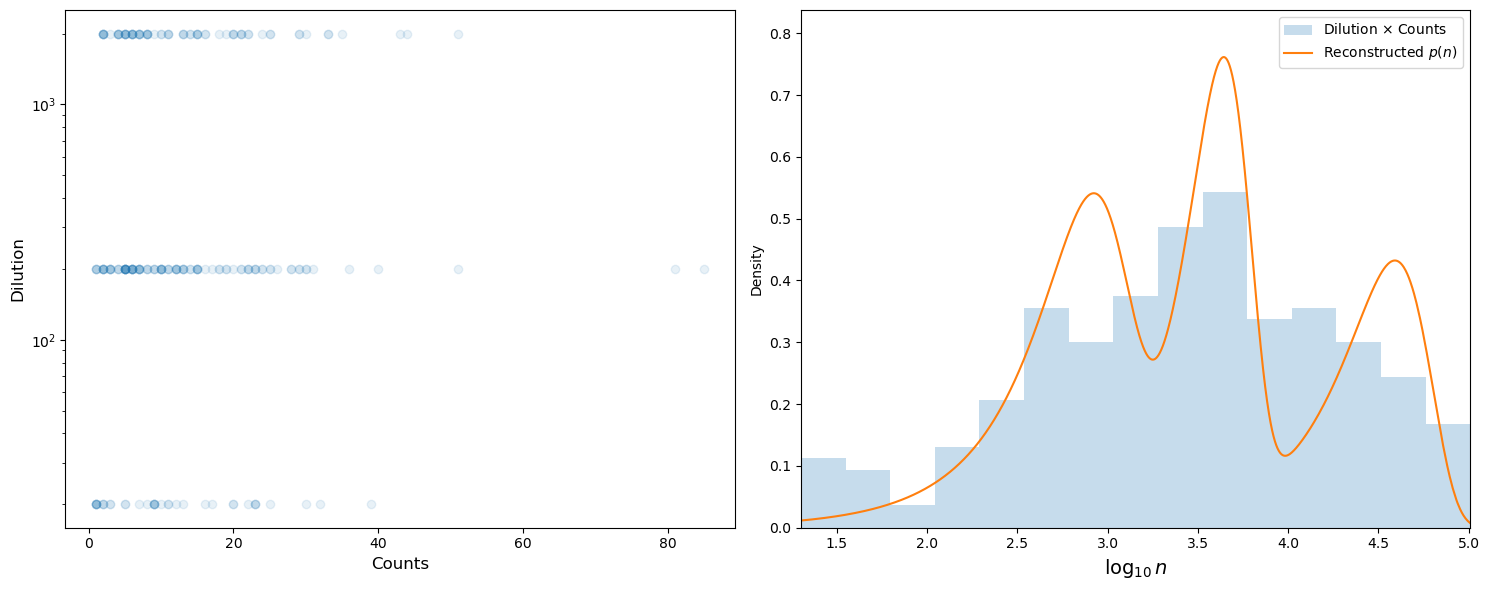

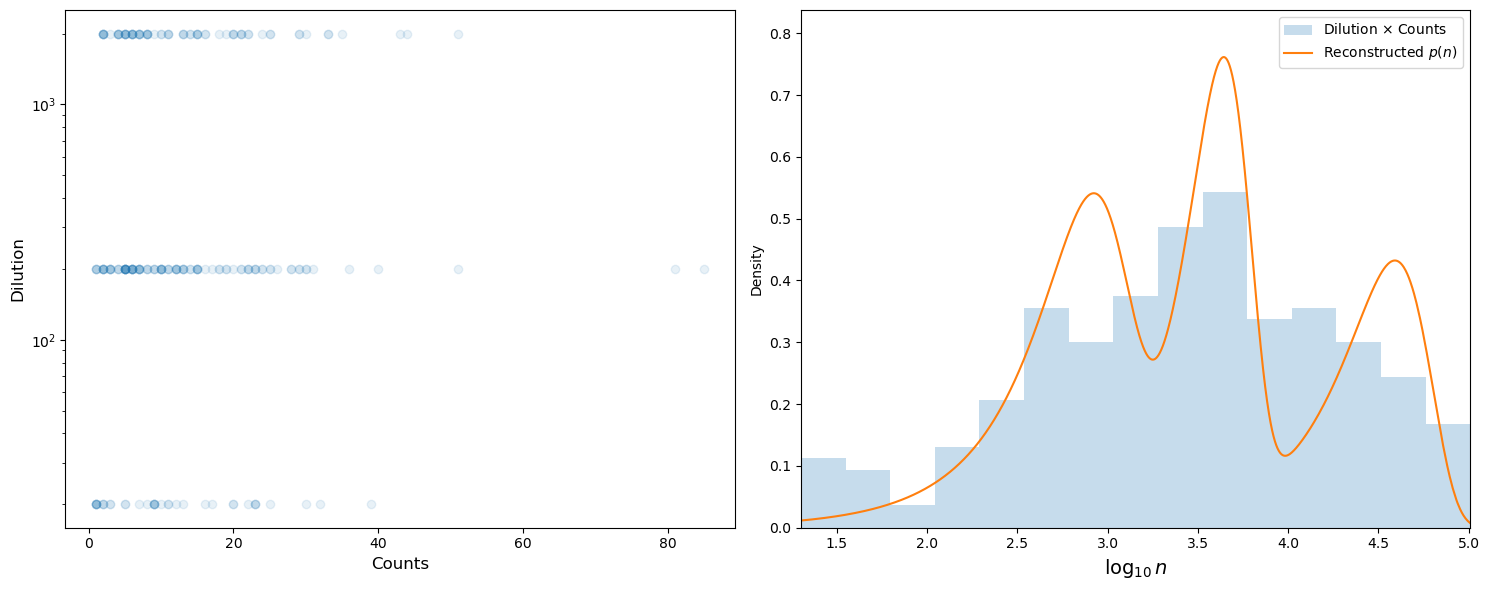

In [5]:
data_SA.make_plot(filename='graphs/real/SA_densities.png')